# Visualização de dados com _seaborn_

- O _seaborn_ estende as potencialidades do _matplotlib_ em, praticamente, dois aspectos: 
    - provendo melhor estilização dos gráficos e tornando-os visualmente "belos"; 
    - compactando funções de plotagem do _matplotlib_, de modo que plotagens robustas sejam obtidas com menos instruções de código.

Vamos começar importando as bibliotecas que utilizaremos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  

Vamos reconstruir e importar alguns *DataFrames*.

In [2]:
serie_Idade = pd.Series({'Ana':20, 'João': 19, 'Maria': 21, 'Pedro': 22, 'Túlio': 20}, name="Idade")
serie_Peso = pd.Series({'Ana':55, 'João': 80, 'Maria': 62, 'Pedro': 67, 'Túlio': 73}, name="Peso")
serie_Altura = pd.Series({'Ana':162, 'João': 178, 'Maria': 162, 'Pedro': 165, 'Túlio': 171}, name="Altura")

In [3]:
dicionario_series_exemplo = {'Idade': serie_Idade, 'Peso': serie_Peso, 'Altura': serie_Altura}

In [4]:
df_dict_series = pd.DataFrame(dicionario_series_exemplo);df_dict_series

,Idade,Peso,Altura
Ana,20,55,162
João,19,80,178
Maria,21,62,162
Pedro,22,67,165
Túlio,20,73,171


In [5]:
df_exemplo = pd.read_csv('../database/exemplo_data.csv', index_col=0)
df_exemplo['coluna_3'] = pd.Series([1,2,3,4,5,6,7,8,np.nan,np.nan],index=df_exemplo.index)
df_exemplo.index = pd.to_datetime(df_exemplo.index)
df_exemplo

,coluna_1,coluna_2,coluna_3
2020-01-01,-0.416092,1.810364,1.0
2020-01-02,-0.137970,2.578520,2.0
2020-01-03,0.575827,0.060866,3.0
2020-01-04,-0.017367,1.299587,4.0
2020-01-05,1.384279,-0.381732,5.0
2020-01-06,0.549706,-1.308789,6.0
2020-01-07,-0.282296,-1.688979,7.0
2020-01-08,-0.989730,-0.028121,8.0
2020-01-09,0.275582,-0.177659,NaN
2020-01-10,0.685132,0.502535,NaN


In [6]:
covid_PB = pd.read_csv('https://superset.plataformatarget.com.br/superset/explore_json/?form_data=%7B%22slice_id%22%3A1550%7D&csv=true', 
                             sep=',', index_col=0)
covid_PB.head()

,casosAcumulados,casosNovos,descartados,recuperados,obitosAcumulados,obitosNovos,Letalidade
data,,,,,,,
2021-10-26,445012,50,484906,337941,9399,1.0,0.0211
2021-10-25,444962,33,484859,337928,9398,3.0,0.0211
2021-10-24,444929,177,484859,337925,9395,4.0,0.0211
2021-10-23,444752,184,484853,337695,9391,5.0,0.0211
2021-10-22,444568,216,484830,337646,9386,1.0,0.0211


In [7]:
covid_BR = pd.read_excel('../database/HIST_PAINEL_COVIDBR_25jul2020.xlsx')
covid_BR.head()

,Unnamed: 0,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN,NaN
1,1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN,NaN
2,2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN,NaN
3,3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN,NaN
4,4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN,NaN


## Gráficos de Linha e de Dispersão

Através da função `relplot`, podemos alterar o valor do parâmetro `kind` para
obter gráficos do linha, com `kind = 'line'`, ou gráficos de dispersão, com `kind  = 'scatter'`. De modo alternativo, poderíamos também utilizar as funções `lineplot` e `scatterplot`. Entretanto, com `relplot`, diversos elementos de construção de figura existentes no *matplotlib* já são pré-configurados no _seaborn_. Isto é chamado no *seaborn* de *figure-level plot*.

Inicialmente, vejamos como a função `lineplot` se comporta como qualquer outra do `matplotlib.pyplot`.

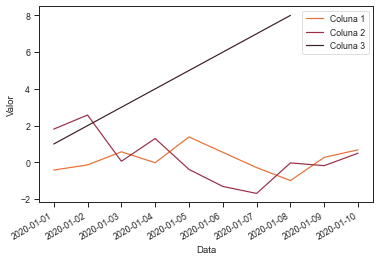

In [63]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="index", y="coluna_1", data=df_exemplo.reset_index(), label = 'Coluna 1')
ax = sns.lineplot(x="index", y="coluna_2", data=df_exemplo.reset_index(), label = 'Coluna 2')
ax = sns.lineplot(x="index", y="coluna_3", data=df_exemplo.reset_index(), label = 'Coluna 3')
ax.set_xlabel('Data')
ax.set_ylabel('Valor')
fig.autofmt_xdate() # auto-formata xticks tipo "data"

Para utilizar a função `relplot`, precisaremos reorganizar o banco de dados de modo que haja apenas uma coluna de valores no eixo _y_ (`Valor`) e uma coluna com um identificador de cor/tonalidade (`Coluna`).

In [65]:
# reorganiza para 'Coluna 1'
df_exemplo_px = pd.DataFrame(df_exemplo['coluna_1']).rename({'coluna_1':'Valor'}, axis=1)
df_exemplo_px['Coluna'] = 'Coluna 1' 

# concatena 'Coluna 2'
df_exemplo_px_temp = pd.DataFrame(df_exemplo['coluna_2']).rename({'coluna_2':'Valor'}, axis=1)
df_exemplo_px_temp['Coluna'] = 'Coluna 2'
df_exemplo_px = pd.concat([df_exemplo_px, df_exemplo_px_temp])

# concatena 'Coluna 3'
df_exemplo_px_temp = pd.DataFrame(df_exemplo['coluna_3']).rename({'coluna_3':'Valor'}, axis=1)
df_exemplo_px_temp['Coluna'] = 'Coluna 3'
df_exemplo_px = pd.concat([df_exemplo_px, df_exemplo_px_temp])

df_exemplo_px

,Valor,Coluna
2020-01-01,-0.416092,Coluna 1
2020-01-02,-0.137970,Coluna 1
2020-01-03,0.575827,Coluna 1
2020-01-04,-0.017367,Coluna 1
2020-01-05,1.384279,Coluna 1
2020-01-06,0.549706,Coluna 1
2020-01-07,-0.282296,Coluna 1
2020-01-08,-0.989730,Coluna 1
2020-01-09,0.275582,Coluna 1
2020-01-10,0.685132,Coluna 1


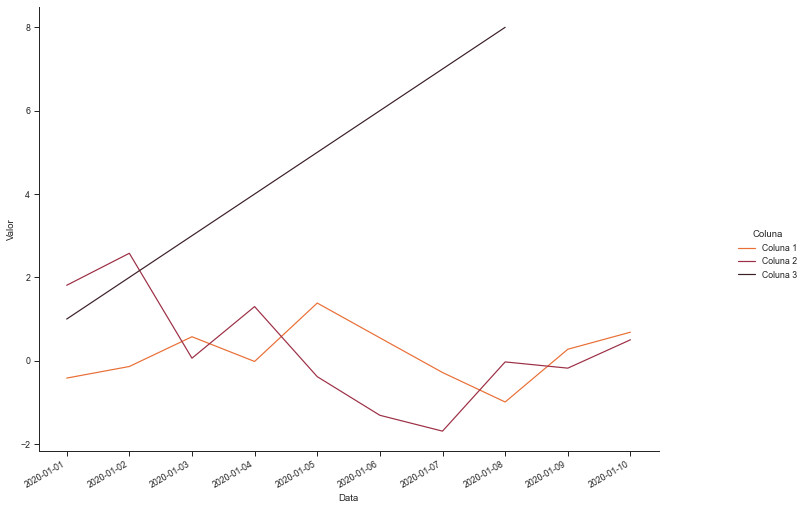

In [67]:
# 'hue' atribui as tonalidades de cor com base no identificador 
p = sns.relplot(x = 'index', y='Valor', hue = 'Coluna', data=df_exemplo_px.reset_index().dropna(), kind='line')
p.fig.autofmt_xdate()
p.ax.set_xlabel('Data')
p.fig.set_size_inches(12,8) # largura, altura

Vamos agora plotar o gráfico de óbitos por COVID-19 na Paraíba juntamente com a média aritmética móvel de 7 dias e com a média geométrica móvel de 7 dias.

Utilizaremos o método `rolling` de uma *Series* ou *DataFrame* do *pandas*. Este método cria janelas móveis onde podemos aplicar uma função agregadora (tal como média ou média geométrica).

Comentários: 

- A média aritmética tem a desvantagem de linearizar o efeito do crescimento ou decrescimento do número de óbitos, onde sabemos que o efeito é exponencial.
- A média geométrica móvel tem a desvantagem de se anular se o número de óbitos em algum dos dias da janela for zero.
- Em geral, as duas médias ficam muito próximas.

In [68]:
# função que calcula a média geométrica
from scipy.stats import gmean 

# série
covid_PB_obitos = covid_PB.obitosNovos
covid_PB_obitos = covid_PB_obitos.sort_index()
covid_PB_obitos.name = 'Óbitos'

# dataframe
covid_PB_obitos_df = pd.DataFrame(covid_PB_obitos)
covid_PB_obitos_df['Tipo'] = 'Valor nominal'

# média aritmética móvel
covid_PB_obitos_df_temp = pd.DataFrame(covid_PB_obitos.rolling(7).mean().dropna())
covid_PB_obitos_df_temp['Tipo'] = 'MM:arit - 7d'
covid_PB_obitos_df = pd.concat([covid_PB_obitos_df, covid_PB_obitos_df_temp])

# média geométrica móvel
covid_PB_obitos_df_temp = pd.DataFrame(covid_PB_obitos.rolling(7).aggregate(gmean).dropna())
covid_PB_obitos_df_temp['Tipo'] = 'MM:geom - 7d'
covid_PB_obitos_df = pd.concat([covid_PB_obitos_df, covid_PB_obitos_df_temp])

covid_PB_obitos_df.index = pd.to_datetime(covid_PB_obitos_df.index)

covid_PB_obitos_df.tail()

,Óbitos,Tipo
data,,
2021-10-22,0.000000,MM:geom - 7d
2021-10-23,0.000000,MM:geom - 7d
2021-10-24,0.000000,MM:geom - 7d
2021-10-25,3.465261,MM:geom - 7d
2021-10-26,2.842676,MM:geom - 7d


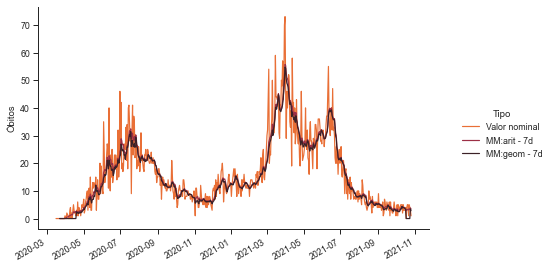

In [71]:
p = sns.relplot(x = 'data', y='Óbitos', 
                hue = 'Tipo', 
                data=covid_PB_obitos_df.reset_index(), 
                kind='line')
p.fig.autofmt_xdate()
p.ax.set_xlabel(''); 
p.fig.set_size_inches(8,4)

Vamos agora construir um gráfico de dispersão com o _DataFrame_ `df_exemplo_px`.

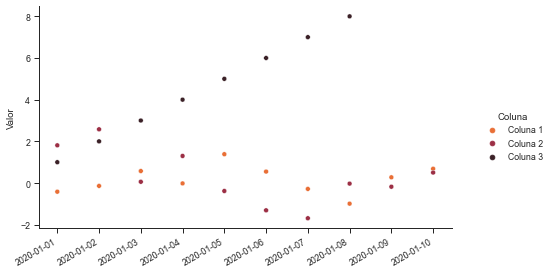

In [73]:
# 'scatter' é padrão
p = sns.relplot(x = 'index', y='Valor', 
                hue = 'Coluna', 
                data=df_exemplo_px.reset_index().dropna())
p.fig.autofmt_xdate()
p.ax.set_xlabel(''); 
p.fig.set_size_inches(8,4)

Vamos forçar os limites de datas a ficarem dentro do mínimo (menos um dia) e do máximo (mais um dia):

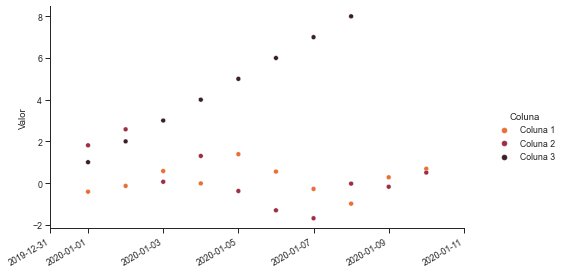

In [78]:
p = sns.relplot(x = 'index', y='Valor', 
                      hue = 'Coluna', 
                      data=df_exemplo_px.reset_index().dropna())

# offset de data
p.ax.set_xlim((df_exemplo_px.reset_index()['index'].min()
               - pd.DateOffset(days=1)),
              (df_exemplo_px.reset_index()['index'].max()
               + pd.DateOffset(days=1)))

p.fig.autofmt_xdate()
p.ax.set_xlabel(''); 
p.fig.set_size_inches(8,4)

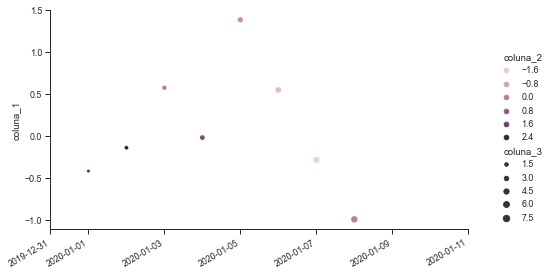

In [80]:
# especifica cores e tamanhos
p = sns.relplot(x = 'index', y='coluna_1', 
                hue = 'coluna_2', 
                size = 'coluna_3', 
                data=df_exemplo.reset_index().dropna())

p.ax.set_xlim((df_exemplo.reset_index()['index'].min()
               - pd.DateOffset(days=1)), 
              (df_exemplo.reset_index()['index'].max()
               + pd.DateOffset(days=1)))

p.fig.autofmt_xdate()
p.ax.set_xlabel('')
p.fig.set_size_inches(8,4)

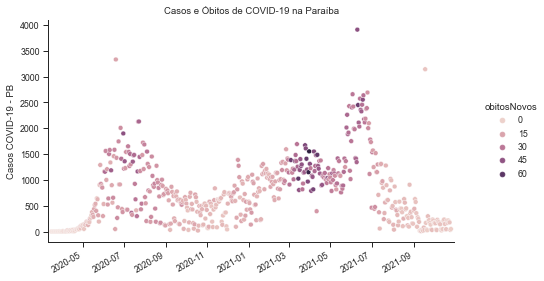

In [81]:
covid_PB_casos_obitos = covid_PB[['obitosNovos', 'casosNovos']].sort_index()
covid_PB_casos_obitos.index = pd.to_datetime(covid_PB_casos_obitos.index)
# cor: óbitos novos
p = sns.relplot(x = 'data', y = 'casosNovos', 
                hue = 'obitosNovos', 
                data=covid_PB_casos_obitos.reset_index())
p.ax.set_xlim((covid_PB_casos_obitos.reset_index()['data'].min()
               - pd.DateOffset(days=5)),
              (covid_PB_casos_obitos.reset_index()['data'].max()
               + pd.DateOffset(days=5)))
p.fig.autofmt_xdate()
p.ax.set_xlabel('')
p.ax.set_ylabel('Casos COVID-19 - PB')
p.ax.set_title('Casos e Óbitos de COVID-19 na Paraíba')
p.fig.set_size_inches(8,4)

## Gráficos de dispersão em dados categóricos

Quando há muitos valores repetidos em uma variável, os gráficos de dispersão podem não ilustrar efetivamente o comportamento dos dados. Neste caso, é interessante que o gráfico considere a repetição dos valores dentro de uma mesma categoria.

Comentários:

- Isto acontece quando o eixo horizontal contém variáveis categóricas e, assim, tem-se repetição de valores dentro de uma mesma categoria.

Para gráficos deste tipo, utilizaremos os dados de óbitos por COVID-19 no Brasil. Agruparemos o número de óbitos por dia da semana.

In [82]:
covid_BR_obitos = covid_BR.query('regiao == "Brasil"')[['obitosNovos','data']]

covid_BR_obitos.data = pd.to_datetime(covid_BR_obitos.data)

covid_BR_obitos['Dia'] = covid_BR_obitos.data.dt.weekday.map(
    {0:'Segunda-Feira',
     1:'Terça-Feira',
     2:'Quarta-Feira',
     3:'Quinta-Feira',
     4:'Sexta-Feira',
     5:'Sábado',
     6:'Domingo'})

covid_BR_obitos = covid_BR_obitos.set_index('data')
covid_BR_obitos

,obitosNovos,Dia
data,,
2020-02-25,0,Terça-Feira
2020-02-26,0,Quarta-Feira
2020-02-27,0,Quinta-Feira
2020-02-28,0,Sexta-Feira
2020-02-29,0,Sábado
...,...,...
2020-07-21,1367,Terça-Feira
2020-07-22,1284,Quarta-Feira
2020-07-23,1311,Quinta-Feira


Se quisermos determinar a ordem do eixo _x_, `relplot` não é a função ideal. Além disso, devido à sobreposição dos dados, ela definitivamente não é a ideal para variáveis categóricas. Vejamos:

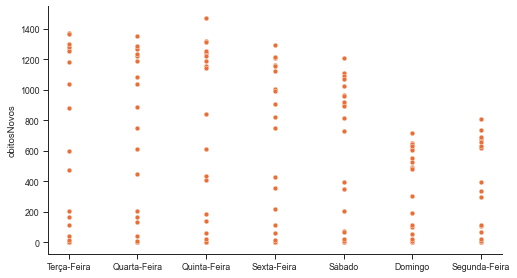

In [83]:
p = sns.relplot(x='Dia', y='obitosNovos', data=covid_BR_obitos)
p.ax.set_xlabel(''); 
p.fig.set_size_inches(8,4)

## O gráfico *stripplot*

O *stripplot* é um gráfico de dispersão onde a cada observação é colocado um deslocamento aleatório para evitar a sobreposição e fornecer uma ideia mais precisa da quantidade de dados.

Vamos construir o *stripplot* através da função `catplot`. O *stripplot* é o gráfico padrão do `catplot` (tem o argumento `kind = 'strip'`).

Podemos determinar a ordem das variáveis categóricas com o argumento *order*.

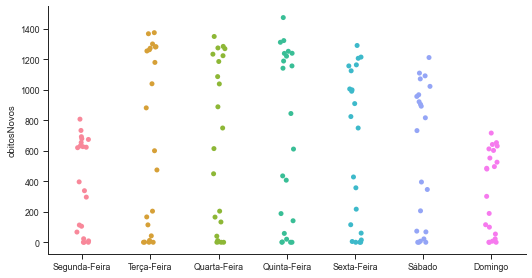

In [84]:
p = sns.catplot(x='Dia', y='obitosNovos', 
                data=covid_BR_obitos, order = 
                ['Segunda-Feira', 'Terça-Feira',
                 'Quarta-Feira', 'Quinta-Feira',
                 'Sexta-Feira', 'Sábado', 'Domingo'])

p.ax.set_xlabel('');
p.fig.set_size_inches(8,4)

Se colocarmos `jitter=False`, obteremos o gráfico de dispersão usual (com o detalhe de que podemos definir a ordem dos rótulos do eixo *x*).

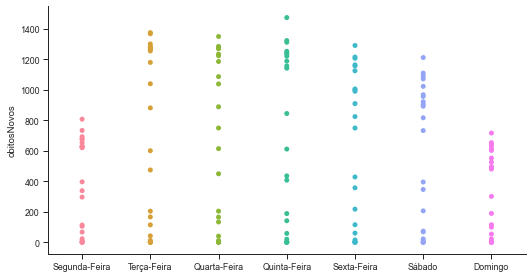

In [85]:
p = sns.catplot(x='Dia', y='obitosNovos', 
                jitter = False,
                data=covid_BR_obitos,
                order = ['Segunda-Feira', 'Terça-Feira',
                         'Quarta-Feira', 'Quinta-Feira',
                         'Sexta-Feira', 'Sábado', 'Domingo'])

p.ax.set_xlabel(''); 
p.fig.set_size_inches(8,4)

## O gráfico *swarmplot*

O *swarmplot* é um gráfico de dispersão onde, diferentemente do *stripplot*, nenhum dado pode ficar sobreposto. Desta forma, também fornece uma ideia mais precisa da quantidade de dados.

Construiremos o *swarmplot* através da função `catplot` com o argumento `kind = 'swarm'`. Como o *swarmplot* também é um tipo do `catplot`, podemos determinar a ordem das variáveis categóricas com o argumento `order`.

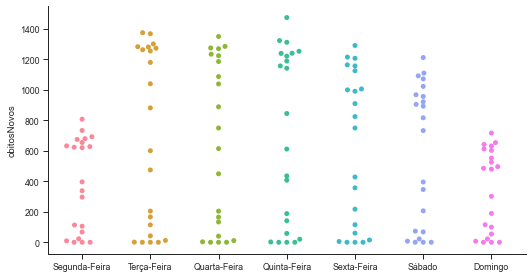

In [86]:
p = sns.catplot(x='Dia', y='obitosNovos',
                kind = 'swarm',
                data=covid_BR_obitos, 
                order = ['Segunda-Feira', 'Terça-Feira',
                         'Quarta-Feira', 'Quinta-Feira',
                         'Sexta-Feira', 'Sábado', 'Domingo'])

p.ax.set_xlabel('');
p.fig.set_size_inches(8,4)

## Gráficos de Barras e Colunas

Para criar gráficos de barras e colunas com o *seaborn* utilizaremos a função `catplot` com o argumento `kind=bar`. Se a variável categórica estiver no eixo *x*, o gráfico será de coluna; se a variável categórica estiver no eixo *y*, o gráfico será de barra.

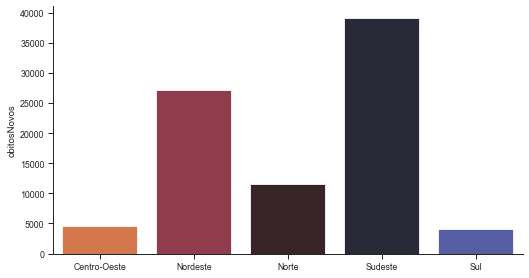

In [88]:
covid_Regioes = covid_BR[['regiao','obitosNovos']].groupby('regiao').sum().query('regiao != "Brasil"')/2

p = sns.catplot(x='regiao', y='obitosNovos',
                kind = 'bar',data=covid_Regioes.reset_index())

p.ax.set_xlabel('');
p.fig.set_size_inches(8,4)

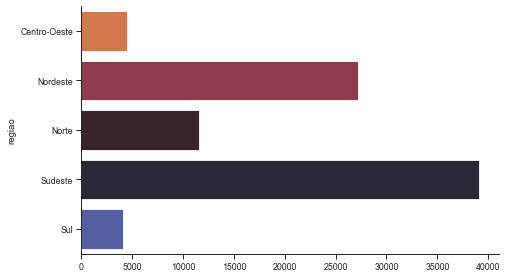

In [91]:
covid_Regioes = covid_BR[['regiao','obitosNovos']].groupby('regiao').sum().query('regiao != "Brasil"')/2

p = sns.catplot(x='obitosNovos', y='regiao', 
                kind = 'bar',data=covid_Regioes.reset_index())

p.ax.set_xlabel('');
p.fig.set_size_inches(8,4)

In [93]:
df_dict_series_sns = pd.DataFrame(df_dict_series.Idade).rename({'Idade':'Valor'}, axis=1)
df_dict_series_sns['Dado'] = 'Idade'

df_dict_series_sns_temp = pd.DataFrame(df_dict_series.Altura).rename({'Altura':'Valor'}, axis=1)
df_dict_series_sns_temp['Dado'] = 'Altura'
df_dict_series_sns = pd.concat([df_dict_series_sns, df_dict_series_sns_temp])

df_dict_series_sns_temp = pd.DataFrame(df_dict_series.Peso).rename({'Peso':'Valor'}, axis=1)
df_dict_series_sns_temp['Dado'] = 'Peso'
df_dict_series_sns = pd.concat([df_dict_series_sns, df_dict_series_sns_temp])

df_dict_series_sns

,Valor,Dado
Ana,20,Idade
João,19,Idade
Maria,21,Idade
Pedro,22,Idade
Túlio,20,Idade
Ana,162,Altura
João,178,Altura
Maria,162,Altura
Pedro,165,Altura
Túlio,171,Altura


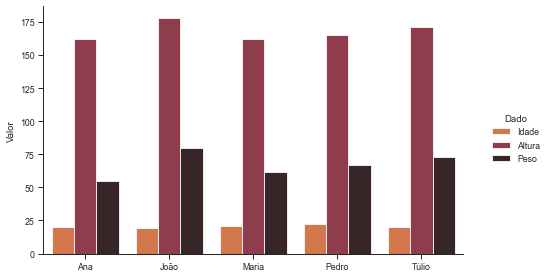

In [94]:
p = sns.catplot(x='index', y='Valor', 
                hue='Dado',
                data = df_dict_series_sns.reset_index(),
                kind='bar')

p.ax.set_xlabel('');  
p.fig.set_size_inches(8,4)

## _Box Plot_ e plots alternativos

Tanto o *BoxPlot* quanto os plots alternativos que apresentaremos aqui (*violinplot* e *boxenplot*) fazem parte do `catplot`. Para construir um 

- *Box Plot* utiliza-se o argumento `kind='box'`;
- *Violin Plot* utiliza-se o argumento `kind='violin'`;
- *Boxen Plot* (ou *letter-value plot*) utiliza-se o argumento `kind='boxen'`.

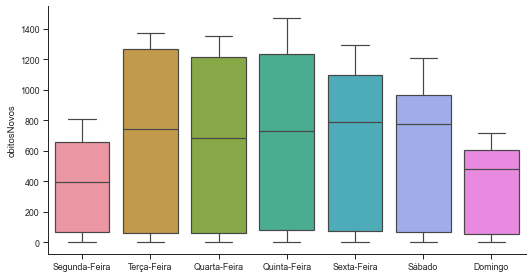

In [95]:
p = sns.catplot(x='Dia', y='obitosNovos',
                kind = 'box',
                data=covid_BR_obitos,
                order = ['Segunda-Feira', 'Terça-Feira',
                         'Quarta-Feira', 'Quinta-Feira',
                         'Sexta-Feira', 'Sábado', 'Domingo'])

p.ax.set_xlabel('');
p.fig.set_size_inches(8,4)

In [96]:
covid_regioes_diarios_px = covid_BR.set_index(
    'data').query('regiao != "Brasil"')[['obitosNovos', 'regiao']].reset_index().rename(
    {'obitosNovos':'Óbitos','regiao':'Região','data':'Data'},axis=1)

covid_regioes_diarios_px = covid_regioes_diarios_px.groupby(['Região','Data']).sum()/2
covid_regioes_diarios_px = covid_regioes_diarios_px.reset_index().set_index('Data')

covid_regioes_diarios_px

,Região,Óbitos
Data,,
2020-02-25,Centro-Oeste,0.0
2020-02-26,Centro-Oeste,0.0
2020-02-27,Centro-Oeste,0.0
2020-02-28,Centro-Oeste,0.0
2020-02-29,Centro-Oeste,0.0
...,...,...
2020-07-21,Sul,166.0
2020-07-22,Sul,146.0
2020-07-23,Sul,165.0


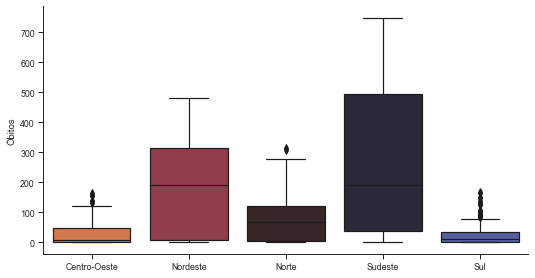

In [99]:
p = sns.catplot(x='Região', y='Óbitos',
                kind = 'box',
                data=covid_regioes_diarios_px)

p.ax.set_xlabel('');
p.fig.set_size_inches(8,4)

Na presença de muitos *outliers*, como é o caso do gráfico anterior, é interessante considerar uma alternativa ao *Box Plot*.

Vamos ver agora o *Boxen Plot* (ou *letter-value plots*). Este plot considera os quantis: ..., 0.8%, 1.56%, 3.13%, 6.25%, 12.5%, 25%, 50%, 75%, 87.5%, 93.75%, 96.88%, 98.44%, 99.24%, ...

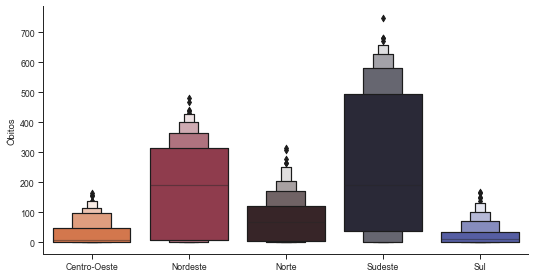

In [100]:
p = sns.catplot(x='Região', y='Óbitos',
                kind = 'boxen',
                data=covid_regioes_diarios_px)

p.ax.set_xlabel(''); 
p.fig.set_size_inches(8,4)

Porém, em um gráfico sem muitos *outliers*, o *Boxen Plot* não difere muito do *Box Plot*.

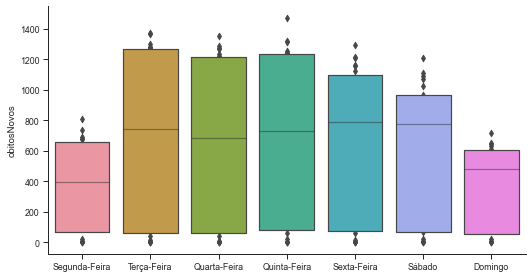

In [102]:
p = sns.catplot(x='Dia', y='obitosNovos',
                kind = 'boxen', 
                data=covid_BR_obitos, 
                order = ['Segunda-Feira', 'Terça-Feira',
                         'Quarta-Feira', 'Quinta-Feira',
                         'Sexta-Feira', 'Sábado', 'Domingo'])
p.ax.set_xlabel('');
p.fig.set_size_inches(8,4)

Na presença de muitos *outliers*, também é preferível um *Violin Plot* em vez de um *Box Plot*, para tornar visível o que está ocorrendo.

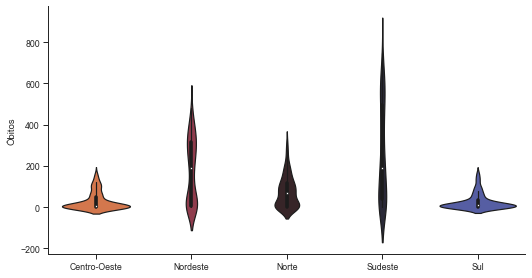

In [104]:
p = sns.catplot(x='Região', y='Óbitos',
                kind = 'violin',
                data=covid_regioes_diarios_px)

p.ax.set_xlabel('');
p.fig.set_size_inches(8,4)

Muitas vezes, é interessante sobrepor um *Violin Plot* a um *Swarm Plot* para evidenciar o comportamento da distribuição dos dados.

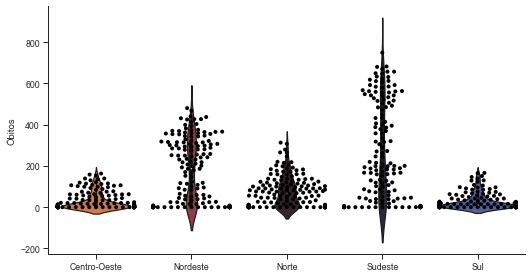

In [108]:
p = sns.catplot(x='Região', y='Óbitos',
                kind = 'violin',
                data=covid_regioes_diarios_px)

sns.swarmplot(x='Região', y='Óbitos',
              data=covid_regioes_diarios_px,
              ax = p.ax,
              size=4, color='k')

p.ax.set_xlabel('');
p.fig.set_size_inches(8,4)

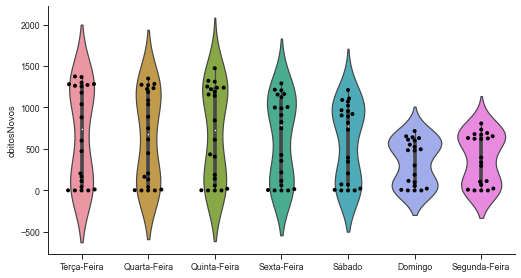

In [109]:
p = sns.catplot(x='Dia', y='obitosNovos',
                kind = 'violin',
                data=covid_BR_obitos)

sns.swarmplot(x='Dia', y='obitosNovos',
              data=covid_BR_obitos,
              ax = p.ax, size=4, color='k') 

p.ax.set_xlabel('');
p.fig.set_size_inches(8,4) 

## Histogramas

O *seaborn* constrói histogramas a partir da função `histplot`, ou da função obsoleta `distplot`. 

Incluímos um estimador de densidade baseado em núcleo Gaussiano (_Gaussian kernel_) utilizando o argumento `kde=True`.

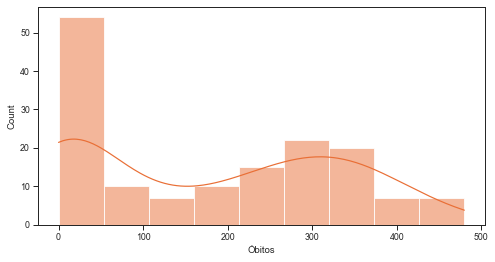

In [110]:
fig, ax = plt.subplots(figsize=(8,4))
_ = sns.histplot(covid_regioes_diarios_px.query('Região=="Nordeste"')['Óbitos'],kde=True)

Para remover o estimador, selecionamos `kde=False`.

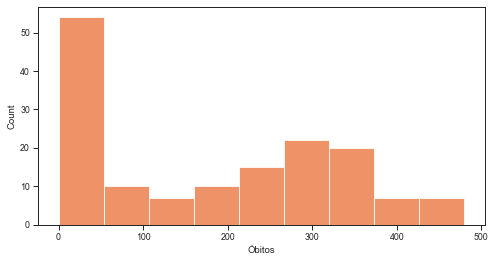

In [111]:
fig, ax = plt.subplots(figsize=(8,4))
_ = sns.histplot(covid_regioes_diarios_px.query('Região=="Nordeste"')['Óbitos'],kde=False)

Para plotarmos apenas o estimador de densidade sem o histograma, usamos `distplot` com a opção `hist=False`.

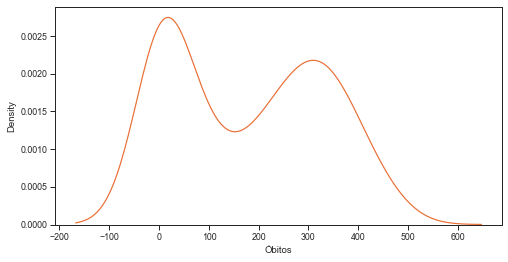

In [112]:
fig, ax = plt.subplots(figsize=(8,4))
_ = sns.distplot(covid_regioes_diarios_px.query('Região=="Nordeste"')['Óbitos'],hist=False)

É possível plotar o histograma com o estimador para qualquer série do _DataFrame_.

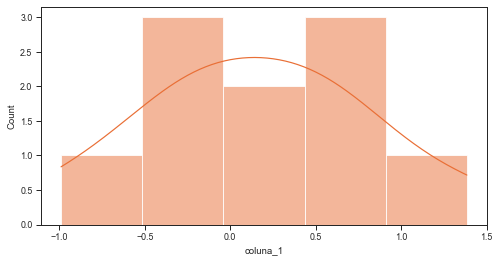

In [113]:
fig, ax = plt.subplots(figsize=(8,4))
_ = sns.histplot(df_exemplo['coluna_1'],kde=True)

## Distribuição conjunta e marginal

O histograma permite que verifiquemos a distribuição de uma ou mais variáveis, mas sem levar outras em consideração. Para plotarmos uma distribuição conjunta, bem como a distribuição individual (marginal) de cada variável, podemos utilizar a função `jointplot`.

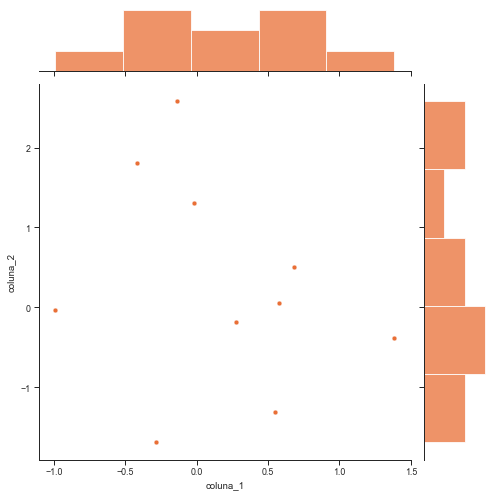

In [115]:
_ = sns.jointplot(x = 'coluna_1', y = 'coluna_2', data=df_exemplo, height=7)

O próximo exemplo usa a função `jointplot` para plotar distribuições conjuntas relativas ao número de óbitos por Covid-19 por região do Brasil durante uma certa janela temporal.

In [117]:
covid_regioes_diarios = pd.DataFrame()

regioes = covid_BR.query('regiao != "Brasil"')['regiao'].drop_duplicates().array

for regiao in regioes:
    temp_series = covid_BR.set_index('data').query('regiao == @regiao')['obitosNovos'].groupby('data').sum()/2
    temp_series.name = 'obitos_' + regiao
    covid_regioes_diarios = pd.concat([covid_regioes_diarios, temp_series], axis=1)
    
covid_regioes_diarios.index = pd.to_datetime(covid_regioes_diarios.index)
covid_regioes_diarios.head()

,obitos_Norte,obitos_Nordeste,obitos_Sudeste,obitos_Sul,obitos_Centro-Oeste
2020-02-25,0.0,0.0,0.0,0.0,0.0
2020-02-26,0.0,0.0,0.0,0.0,0.0
2020-02-27,0.0,0.0,0.0,0.0,0.0
2020-02-28,0.0,0.0,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0,0.0,0.0


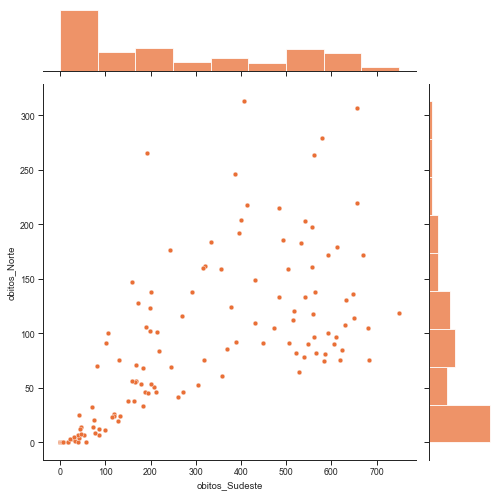

In [126]:
_ = sns.jointplot(x='obitos_Sudeste', y='obitos_Norte',
                  data = covid_regioes_diarios, height=7)

## Estilos e cores

O *seaborn* disponibiliza 5 estilos pré-definidos: *darkgrid*, *whitegrid*, *dark*, *white* e *ticks*. Vejamos cada um deles.

In [127]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

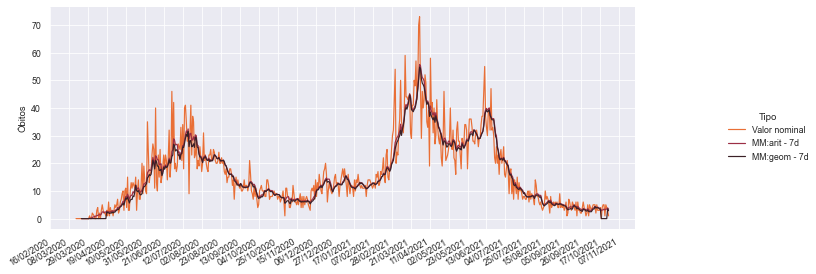

In [129]:
sns.set_style("darkgrid")
p = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
p.fig.autofmt_xdate()
p.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
p.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
p.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
p.ax.set_xlabel(''); p.fig.set_size_inches(12,4)

AttributeError: module 'matplotlib.dates' has no attribute 'DateFormatte'

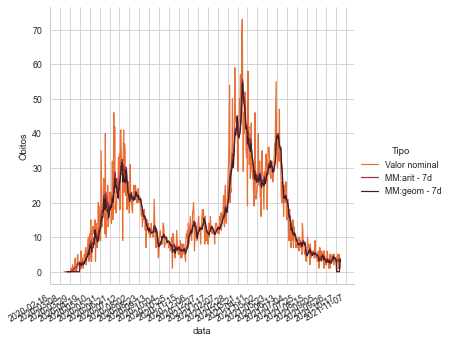

In [135]:
sns.set_style("whitegrid")
p = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
p.fig.autofmt_xdate()
p.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
p.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
p.ax.xaxis.set_major_formatter(mdates.DateFormatte('%d/%m/%Y')) #Formato da data
p.ax.set_xlabel(''); p.fig.set_size_inches(12,4)

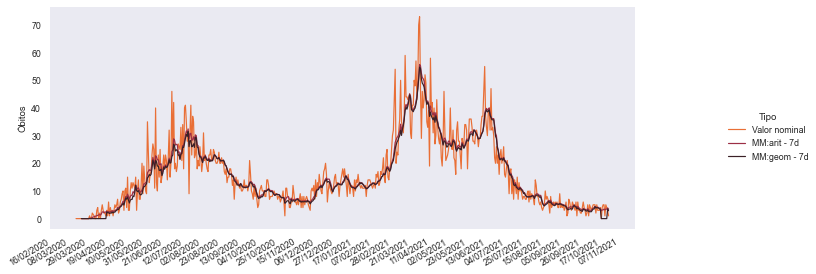

In [137]:
sns.set_style("dark")
p = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
p.fig.autofmt_xdate()
p.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
p.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
p.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
p.ax.set_xlabel(''); p.fig.set_size_inches(12,4)

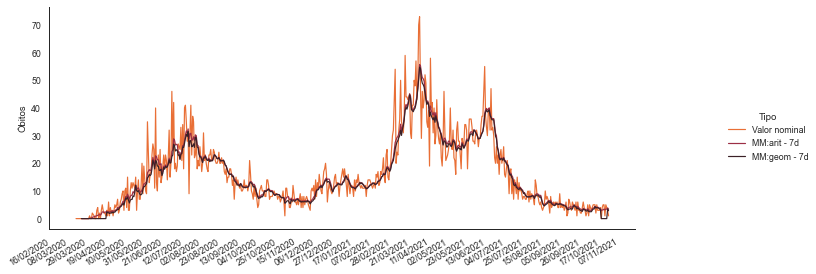

In [138]:
sns.set_style("white")
p = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
p.fig.autofmt_xdate()
p.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
p.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
p.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
p.ax.set_xlabel(''); p.fig.set_size_inches(12,4)

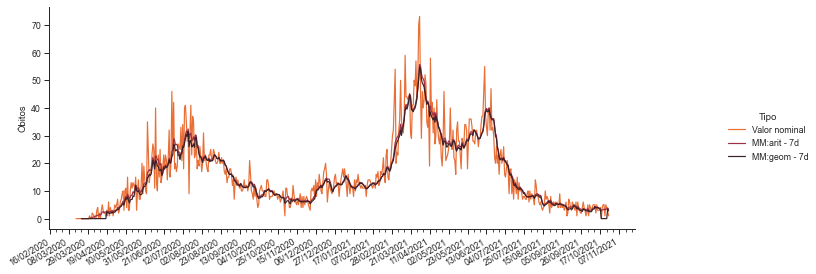

In [140]:
sns.set_style("ticks") # A diferença com o anterior são os "ticks" no eixo x
p = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
p.fig.autofmt_xdate()
p.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
p.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
p.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
p.ax.set_xlabel(''); p.fig.set_size_inches(12,4)

### Molduras

Utilizamos a função `despine` para adicionar ou remover molduras em plotagens com o *seaborn*. Podemos especificar lados para adicionar e remover molduras utilizando os booleanos `True` e `False`.

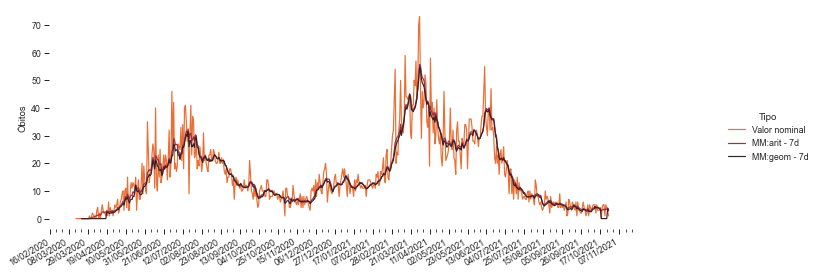

In [149]:
sns.set_style("ticks")
p = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
p.fig.autofmt_xdate()
p.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) 
p.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) 
p.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
p.ax.set_xlabel(''); p.fig.set_size_inches(12,4)
sns.despine(right=True, top=True, left=True, bottom=True)

Podemos criar um tipo de "acolchoamento" aumentando a distância entre o gráfico e a moldura utilizando `offset`. Atribuindo um valor para este argumento, as bordas serão afastadas naturalmente. Um tipo de "corte estético" pode ser adicionado à moldura com `trim=False`.

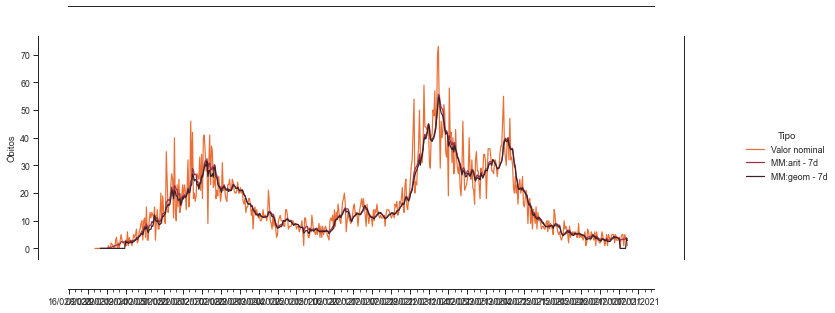

In [151]:
sns.set_style("ticks")
p = sns.relplot(x = 'data', y='Óbitos',
                hue = 'Tipo',
                data=covid_PB_obitos_df.reset_index(),
                kind='line')
p.fig.autofmt_xdate()
p.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
p.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
p.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
p.ax.set_xlabel(''); p.fig.set_size_inches(12,4)
sns.despine(right=False, top=False, offset=30)

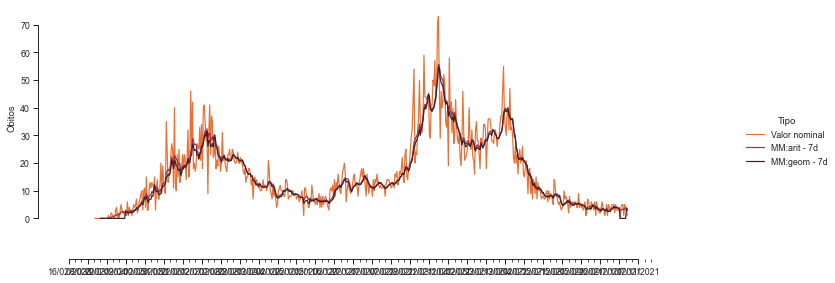

In [162]:
sns.set_style("ticks")
p = sns.relplot(x = 'data', y='Óbitos',
                hue = 'Tipo',
                data=covid_PB_obitos_df.reset_index(),
                kind='line')
p.fig.autofmt_xdate()
p.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
p.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
p.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
p.ax.set_xlabel(''); p.fig.set_size_inches(12,4)
sns.despine(offset=30, trim=True)

### Contextos e escala

O *seaborn* possui contextos pré-definidos que mudam a escala do gráfico para melhor satisfazer a aplicação de interesse. Para definir o contexto, utilizamos a função `set_context`. Há 4 contextos pré-definidos: *paper*, *notebook*, *talk* e *poster*.

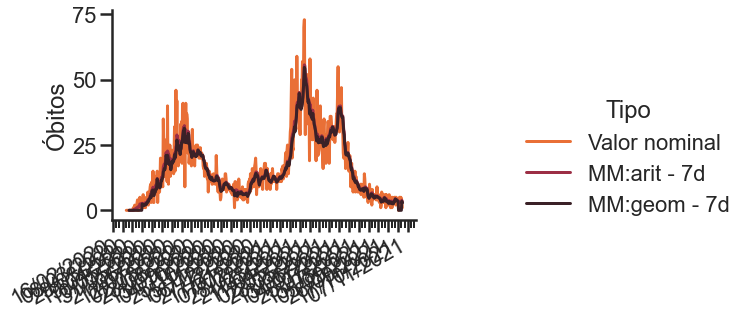

In [165]:
sns.set_context("poster")
sns.set_style("ticks")
p = sns.relplot(x = 'data', y='Óbitos', 
                hue = 'Tipo',
                data=covid_PB_obitos_df.reset_index(),
                kind='line')
p.fig.autofmt_xdate()
p.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
p.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
p.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
p.ax.set_xlabel(''); p.fig.set_size_inches(12,4)

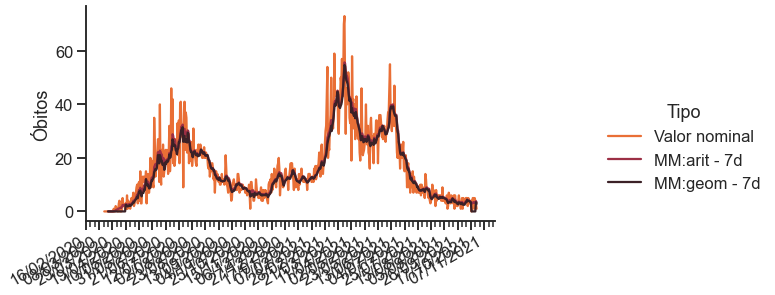

In [168]:
sns.set_context("talk")
sns.set_style("ticks")
p = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
p.fig.autofmt_xdate()
p.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
p.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
p.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
p.ax.set_xlabel(''); p.fig.set_size_inches(12,4)

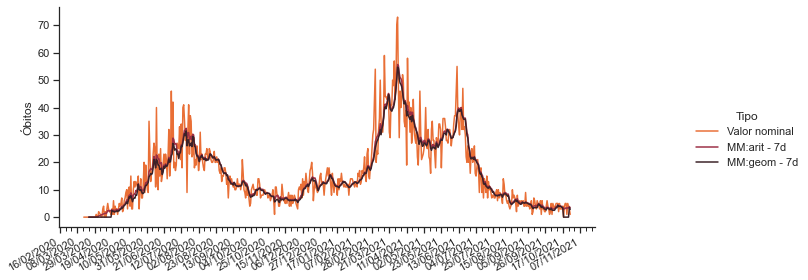

In [170]:
sns.set_context("notebook")
sns.set_style("ticks")
p = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
p.fig.autofmt_xdate()
p.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
p.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
p.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
p.ax.set_xlabel(''); p.fig.set_size_inches(12,4)

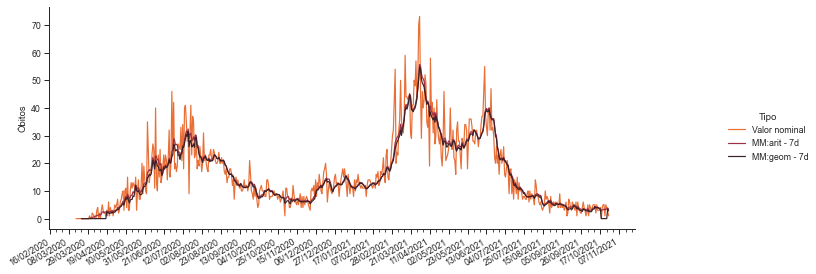

In [172]:
sns.set_context("paper")
sns.set_style("ticks")
p = sns.relplot(x = 'data', y='Óbitos', hue = 'Tipo', data=covid_PB_obitos_df.reset_index(), kind='line')
p.fig.autofmt_xdate()
p.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
p.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
p.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
p.ax.set_xlabel(''); p.fig.set_size_inches(12,4)

### Paletas e mapas de cores

É possível personalizar a paleta de cores a ser utilizada ou escolher uma da lista (extremamente extensa) de paletas disponíveis utilizando a função `set_palette`. Duas formas usuais de selecionar a paleta de cores são:

- no escopo de uma instrução `with` por meio da função `color_palette`;
- pelo argumento `palette` nas funções de construção gráfica.

A função `color_palette()` aceita nomes de uma paleta do _seaborn_ (_deep_, _muted_, _bright_, _pastel_,_dark_,_colorbind_), um mapa de cores (_colormap_) do _matplotlib_, uma sequência de cores em qualquer formato aceitável pelo _matplotlib_, entre outras opções.

```{note}
Para uma lista ampla de paletas, veja a discussão neste [post](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f) ou a [_Colormap reference_](https://matplotlib.org/stable/gallery/color/colormap_reference.html) do _matplotlib_.
```

Abaixo temos alguns exemplos de paletas nativas do _seaborn_

In [173]:
sns.color_palette()

[(0.91463791, 0.43668557, 0.21367954),
 (0.61319563, 0.1824336, 0.2687872),
 (0.22994394, 0.13076731, 0.15146314),
 (0.15652427, 0.15348248, 0.22238175),
 (0.28708711, 0.32912157, 0.69034504),
 (0.33355526, 0.64107876, 0.80445484)]

In [174]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [175]:
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

e de mapas do cores do _matplotlib_.

In [176]:
sns.color_palette('Greens')

[(0.8828143021914648, 0.9546943483275664, 0.8621914648212226),
 (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453)]

In [177]:
sns.color_palette('turbo')

[(0.27698, 0.46153, 0.93309),
 (0.10738, 0.81381, 0.83484),
 (0.38127, 0.98909, 0.42386),
 (0.82333, 0.91253, 0.20663),
 (0.99672, 0.60977, 0.17842),
 (0.8538, 0.2217, 0.02677)]

In [179]:
sns.color_palette('cividis')

[(0.130669, 0.231458, 0.43284),
 (0.298421, 0.332247, 0.423973),
 (0.42512, 0.431334, 0.447692),
 (0.555393, 0.537807, 0.471147),
 (0.695985, 0.648334, 0.440072),
 (0.849223, 0.771947, 0.359729)]

Nos exemplos a seguir, plotamos alguns gráficos novamente com paletas diferentes.

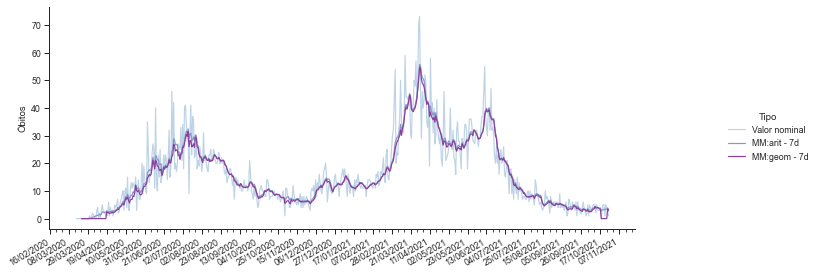

In [181]:
# paleta: 'BuPu'
sns.set_context("paper")
sns.set_style("ticks")
p = sns.relplot(x = 'data', y='Óbitos', 
                hue = 'Tipo', 
                data=covid_PB_obitos_df.reset_index(), kind='line',
                palette = 'BuPu')
p.fig.autofmt_xdate()
p.ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
p.ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
p.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #Formato da data
p.ax.set_xlabel(''); p.fig.set_size_inches(12,4)

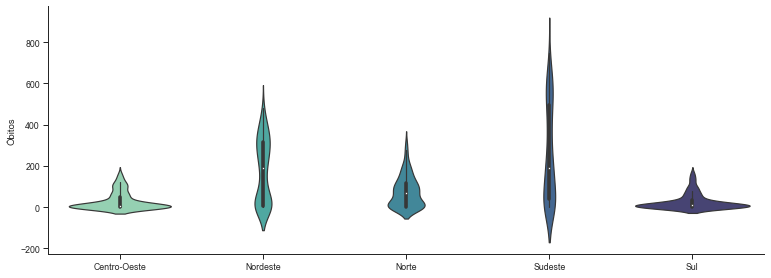

In [182]:
# paleta: 'mako_r'
with sns.color_palette('mako_r'):
    p = sns.catplot(x='Região', y='Óbitos', 
                    kind = 'violin',
                    data=covid_regioes_diarios_px)
    p.ax.set_xlabel(''); p.fig.set_size_inches(12,4)

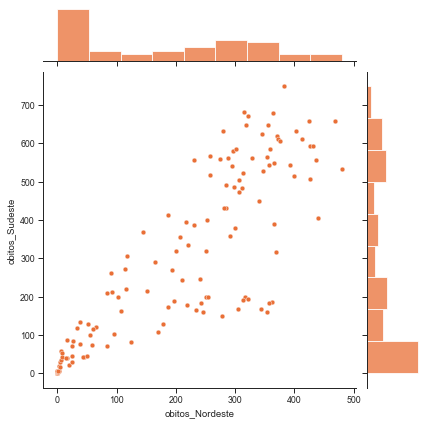

In [183]:
# paleta: icefire_r
sns.set_palette('icefire_r')
_ = sns.jointplot(x='obitos_Nordeste', y='obitos_Sudeste', 
                  data = covid_regioes_diarios, 
                  height=6)

## Nota

Este capítulo baseia-se nas notas de aula da Profa. Andrea Rocha (CI/UFPB), elaboradas para o mini-curso [FMECD](https://gcpeixoto.github.io/FMECD/ipynb/01a-introducao.html).